In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df_dig = df[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company'
    ]]

In [6]:
# 2. Рассчитайте основные статистики для переменных
# (среднее, медиана, мода, мин/макс, сред.отклонение).
print(df_dig.agg(['mean', 'median', 'min', 'max', 'std']))

print(df_dig.mode())

        satisfaction_level  last_evaluation  number_project  \
mean              0.612834         0.716102        3.803054   
median            0.640000         0.720000        4.000000   
min               0.090000         0.360000        2.000000   
max               1.000000         1.000000        7.000000   
std               0.248631         0.171169        1.232592   

        average_montly_hours  time_spend_company  
mean              201.050337            3.498233  
median            200.000000            3.000000  
min                96.000000            2.000000  
max               310.000000           10.000000  
std                49.943099            1.460136  
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  
0                 3.0  
1                 NaN  


In [7]:
# 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименеескоррелированные переменные.
corr = df_dig.corr().abs()
corr


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,0.142970,0.020048,0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,0.100866,0.131591,0.196786,0.127755,1.000000


In [8]:
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,0.142970,0.020048,0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,0.100866,0.131591,0.196786,0.127755,1.000000


In [9]:
# number_project, average_montly_hours - максимальная корреляция
# average_montly_hours, satisfaction_level - минимальная корреляция

In [10]:
# 4. Рассчитайте сколько сотрудников работает в каждомдепартаменте.
df_departament = df[['department', 'satisfaction_level']].groupby('department').count()
df_departament.rename(columns={'satisfaction_level': 'humans'})

,humans
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


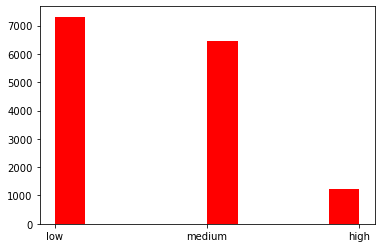

In [11]:
# 5. Показать распределение сотрудников по зарплатам.
plt.hist(df['salary'], color='r');

In [12]:
# 6. Показать распределение сотрудников по зарплатам в каждом
#  департаменте по отдельности
df_salary = df[['department', 'salary', 'satisfaction_level']].groupby(['department', 'salary']).count()
df_salary = df_salary.rename(columns={'satisfaction_level': 'humans'})
df_salary

humans
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

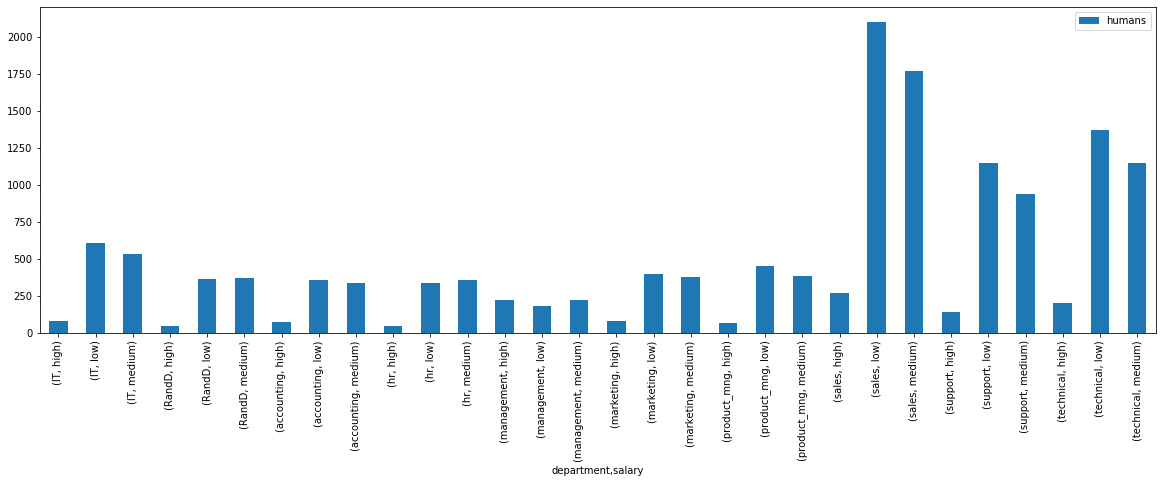

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,6
df_salary.plot(kind='bar', stacked=False);

In [14]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низкимокладом
df_time = df[['average_montly_hours','salary']]
df_time

,average_montly_hours,salary
0,157,low
1,262,medium
2,272,medium
3,223,low
4,159,low
...,...,...
14994,151,low
14995,160,low
14996,143,low
14997,280,low


In [15]:
df_time[df_time['salary'] == 'low'].mean()

average_montly_hours    200.996583
dtype: float64

In [16]:
df_time[df_time['salary'] == 'high'].mean()

average_montly_hours    199.867421
dtype: float64

In [17]:
# Сотрудники с низким окладом в среднем проводят на работе больше времени, чем работники с высоким окладом

In [18]:
df_time[df_time['salary'] == 'medium'].mean()

average_montly_hours    201.338349
dtype: float64

In [19]:
# Сотрудники со сердим окладом в среднем проводят времени больше всех 

In [20]:
# 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#       ● Доля сотрудников с повышением за последние 5 лет
#       ● Средняя степень удовлетворенности
#       ● Среднее количество проектов

In [21]:
df_left = pd.DataFrame(df[df.left == 1])
df_noleft = pd.DataFrame(df[df.left == 0])

In [22]:
print('Уволенные:')
left_promotion = len(df_left[df_left['promotion_last_5years'] == 1])/len(df_left)*100
print(f"\tДоля сотрудников с повышением за последние 5 лет: {left_promotion:.2}%")
print(f'\tСредняя степень удовлетворенности: {df_left.satisfaction_level.mean():.2}')
print(f'\tСреднее количество проектов: {df_left.number_project.mean():.2}')

print('\nНе уволенные:')
noleft_promotion = len(df_noleft[df_noleft['promotion_last_5years'] == 1])/len(df_noleft)*100
print(f"\tДоля сотрудников с повышением за последние 5 лет: {noleft_promotion:.2}%")
print(f'\tСредняя степень удовлетворенности: {df_noleft.satisfaction_level.mean():.2}')
print(f'\tСреднее количество проектов: {df_noleft.number_project.mean():.2}')

Уволенные:
	Доля сотрудников с повышением за последние 5 лет: 0.53%
	Средняя степень удовлетворенности: 0.44
	Среднее количество проектов: 3.9

Не уволенные:
	Доля сотрудников с повышением за последние 5 лет: 2.6%
	Средняя степень удовлетворенности: 0.67
	Среднее количество проектов: 3.8


In [29]:
# 9. Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)
# Оценить качество модели на тестовой выборки
df_ = df.drop(columns=['department', 'salary', 'left'])

# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_, df['left'].to_list(), test_size=0.25)

In [30]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [31]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [40]:
result

,0,1
0,1,0
1,0,0
2,0,0
3,0,1
4,1,0
...,...,...
3745,1,1
3746,0,0
3747,1,0
3748,1,1


In [35]:
# расчет точности 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7645333333333333